<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Divide the mnsist data into training and test

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


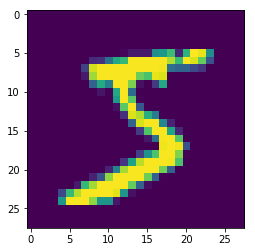

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [46]:
print(X_train.shape[0])

60000


In [47]:
print(X_test.shape[0])

10000


Training and Testig  data 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Printing  first 10 training values

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
Architecture 

Tried initially without dropout. Found to be have overfitting
Intorduced dropout and overfitting ws under control
Results were not repeatable as everytime value are intialized randomly
Added 1*1 filter before maxpooling  with the aim to merge the pre existing features 
Tried to follow standard architectures  to have intially lower number of filter and gradually increase and rediuce the number of channel at 1*1 filter as 
in later layers requires help in extracting more number of features. Initial layer is kept at lower number of channels as we edges and gradients mostly
started with 8 channels and then increased to 32 and tried .Though number of parameters  reduced drastically but got accuracy around 92 only.
So changed to 16 channels


In [27]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))
          

model.add(Convolution2D(32,3,3, activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(32,3,3, activation='relu'))
model.add(Convolution2D(10,3,3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to 

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 16)        528       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 16)        528       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
model.fit(X_train, Y_train, batch_size=512,nb_epoch=50, verbose=1,validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 46us/step - loss: 1.0574 - acc: 0.6385 - val_loss: 0.1985 - val_acc: 0.9378
Epoch 2/50
54000/54000 [==============================] - 2s 33us/step - loss: 0.3132 - acc: 0.9004 - val_loss: 0.1010 - val_acc: 0.9687
Epoch 3/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.2136 - acc: 0.9329 - val_loss: 0.0770 - val_acc: 0.9778
Epoch 4/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.1710 - acc: 0.9464 - val_loss: 0.0660 - val_acc: 0.9808
Epoch 5/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.1503 - acc: 0.9527 - val_loss: 0.0574 - val_acc: 0.9832
Epoch 6/50
54000/54000 [==============================] - 2s 35us/step - loss: 0.1290 - acc: 0.9602 - val_loss: 0.0500 - val_acc: 0.9848
Epoch 7/50
54000/54000 [==============================] - 2s 34us/step - loss: 0.1170 - acc: 0.9639 - val_loss: 0.0502 - val_acc:

In [33]:
model.fit(X_train, Y_train, batch_size=512,nb_epoch=10, verbose=1,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 3072/54000 [>.............................] - ETA: 2s - loss: 0.0435 - acc: 0.9850

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


54000/54000 [==============================] - 2s 35us/step - loss: 0.0425 - acc: 0.9862 - val_loss: 0.0229 - val_acc: 0.9928
Epoch 2/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.0420 - acc: 0.9863 - val_loss: 0.0230 - val_acc: 0.9927
Epoch 3/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.0394 - acc: 0.9873 - val_loss: 0.0248 - val_acc: 0.9920
Epoch 4/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.0392 - acc: 0.9872 - val_loss: 0.0234 - val_acc: 0.9920
Epoch 5/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.0394 - acc: 0.9871 - val_loss: 0.0247 - val_acc: 0.9930
Epoch 6/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.0403 - acc: 0.9870 - val_loss: 0.0248 - val_acc: 0.9923
Epoch 7/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.0383 - acc: 0.9876 - val_loss: 0.0221 - val_acc: 0.9938
Epoch 8/10
54000/54000 [============================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [35]:
print(score)

[0.016795197617393568, 0.9943]


**Observations**

***With fixed batch size =32 and  epoch=10, tried changing architecture ***

1.  *Without over fitting*
Found to be have overfitting no proper accuracy
Intorduced dropout and overfitting ws under control
2.  *Standard architecture*
Tried to follow standard architectures  to have intially lower number of filters  and gradually increase 
Tries with 8 and 16  channels for intial layer and then increased to 16,32 , but not much improvement in accuracy
3  Added 1*1 filter
Tried adding before and after maxpooling  with the aim to merge the pre existing features.but did find much difference in accuracy




***Fixed the above architecture to 3 Convulation blocks and 2 transition blocks  with dropout and 1cross filter***


1.Slowly increased the number of Epochs to 100 keeping batch size constant to 32 and architecture constant  with a thought process  that accurace will improve as it might take to converge .

2. Tried with first with  batch sizes of 32 for 50 epochs and then with batch size of 64 for next 50 epochs with a thought process that backpropogation for different batch sie will help converge and get better accuracy

3.  Slowly increased batch size upto 512 and fixing epochs to 100 and observed accuracy to improve.

4.  Fixed batch size to 512  and tried to increase number of 200 found to have overfitting

5. With trial and error fixed to 512 batch size and and 110 epochs found to get the accuracy above 99.40.


**Learnings**   


1.  Results were not repeatable as everytime value are intialized randomly

2.  Increase batch size with fixed data set has  an impact of weight update

3.  More number of epochs leads to overfitting

4. Increase batch size  andreduce number of batch had an impact  on the  weight update and improve accuracy and reach stable gradient

5. But teh same may not hold good for another kind of dataset.

















In [0]:
y_pred = model.predict(X_test)

In [37]:
print(y_pred[:9])
print(y_test[:9])

[[5.94536790e-13 1.06766329e-09 1.48702853e-07 5.17094918e-08
  4.93426654e-12 2.30173741e-10 9.69967393e-19 9.99999642e-01
  4.55090098e-11 1.58266801e-07]
 [1.86768077e-07 5.81795393e-06 9.99991059e-01 1.14663671e-07
  2.50819681e-07 5.75079949e-11 2.45929346e-06 1.77575510e-10
  7.83902792e-08 3.38546496e-10]
 [7.80805143e-10 9.99988556e-01 5.75226636e-07 2.56992294e-08
  9.01115527e-06 4.54707489e-08 3.30980782e-07 1.12694602e-06
  3.18214290e-07 6.35826822e-08]
 [9.99675035e-01 1.16604885e-11 3.36191260e-06 3.17960307e-08
  1.34161766e-07 1.73435694e-07 2.88520270e-04 1.15543430e-09
  1.25795204e-05 2.02493629e-05]
 [3.94382894e-11 2.32565578e-10 8.37266523e-09 4.52986641e-11
  9.99990106e-01 1.27417859e-11 2.70455978e-08 6.61653898e-10
  1.00800968e-08 9.83231621e-06]
 [1.56875812e-09 9.99982953e-01 3.70117164e-07 1.60814251e-09
  1.48008539e-05 2.27379116e-09 7.63514834e-08 1.63271886e-06
  1.21732938e-07 5.45369119e-08]
 [8.67095702e-14 8.44758874e-10 1.04164288e-09 2.29203158e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [48]:
print(layer_dict)

{'conv2d_22': <keras.layers.convolutional.Conv2D object at 0x7f1da0b8ba58>, 'conv2d_23': <keras.layers.convolutional.Conv2D object at 0x7f1da0b8bcc0>, 'conv2d_24': <keras.layers.convolutional.Conv2D object at 0x7f1da0ba57f0>, 'max_pooling2d_7': <keras.layers.pooling.MaxPooling2D object at 0x7f1da0b67358>, 'dropout_7': <keras.layers.core.Dropout object at 0x7f1da0ba5630>, 'conv2d_25': <keras.layers.convolutional.Conv2D object at 0x7f1da0b54cc0>, 'conv2d_26': <keras.layers.convolutional.Conv2D object at 0x7f1da0ba5668>, 'max_pooling2d_8': <keras.layers.pooling.MaxPooling2D object at 0x7f1da0ad2978>, 'dropout_8': <keras.layers.core.Dropout object at 0x7f1da0b01518>, 'conv2d_27': <keras.layers.convolutional.Conv2D object at 0x7f1da0ae78d0>, 'conv2d_28': <keras.layers.convolutional.Conv2D object at 0x7f1da0b11438>, 'flatten_4': <keras.layers.core.Flatten object at 0x7f1da0afccf8>, 'activation_4': <keras.layers.core.Activation object at 0x7f1da0afcb70>}


In [43]:
print(np.shape(X_train[2]))

(28, 28, 1)


In [45]:
layer_name='conv2d_23'
layer_output = layer_dict[layer_name].output
print(layer_output.shape[3])

32


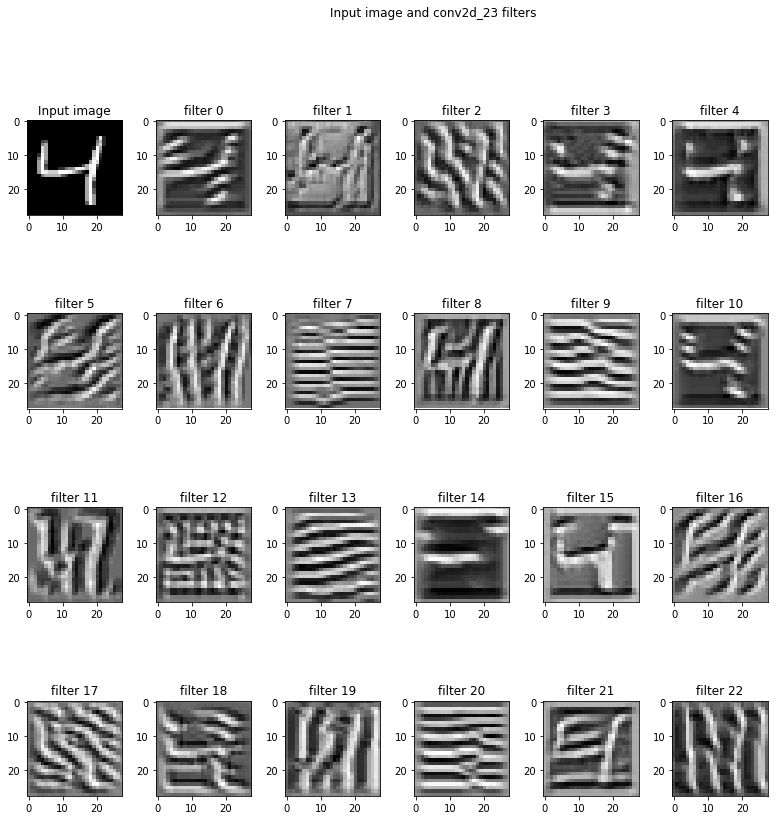

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_23'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()